<a href="https://colab.research.google.com/github/nadunchanna98/MultiOmics-CervicalCancer-MachineLearning-DataProcessing/blob/main/PCA_methylation450K_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
df = pd.read_csv('/content/drive/MyDrive/RESEACH/TCGA Cervical Cancer (CESC)/methilation450K-Preprocessed-data/filtered_dataset.csv')

In [ ]:
df.shape

(312, 202)

In [ ]:
df1 = df[df['histological_type'] != 'Adenosquamous']

In [ ]:
df1.shape

(305, 202)

In [ ]:
selected_features = df1.iloc[:, 2:202]
selected_features

,cg26961332,cg01847620,cg01814098,cg17812026,cg25800170,cg13682477,cg23889391,cg26082557,cg14239811,cg25087487,...,cg08643007,cg08367083,cg00810836,cg04087237,cg25379026,cg08839858,cg15794252,cg09806118,cg04020999,cg06960784
0,0.9904,0.9860,0.0247,0.9570,0.0166,0.0166,0.0158,0.0160,0.0101,0.2729,...,0.0317,0.0183,0.0621,0.0652,0.0122,0.0224,0.0124,0.0120,0.9778,0.0128
1,0.9910,0.9909,0.0150,0.9914,0.0139,0.0172,0.6539,0.0113,0.0093,0.2176,...,0.0377,0.0147,0.0170,0.0191,0.0162,0.6017,0.0623,0.4581,0.9914,0.3205
2,0.9883,0.9424,0.0174,0.9776,0.2976,0.6157,0.0132,0.0454,0.3142,0.0154,...,0.0257,0.0224,0.0190,0.0687,0.4693,0.5097,0.0144,0.0115,0.9845,0.0163
3,0.9901,0.9858,0.0174,0.9898,0.0137,0.0211,0.0169,0.0147,0.0156,0.0167,...,0.0208,0.0264,0.0267,0.0112,0.0208,0.0193,0.0158,0.0144,0.9860,0.0212
4,0.8803,0.6852,0.0172,0.5670,0.2188,0.5187,0.4858,0.4888,0.0070,0.0132,...,0.0282,0.2056,0.0174,0.0142,0.5561,0.4190,0.0168,0.0121,0.9844,0.0603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.9870,0.9878,0.0217,0.7349,0.0180,0.0252,0.0168,0.6354,0.0130,0.0175,...,0.0292,0.0340,0.0227,0.0179,0.3376,0.0217,0.0150,0.0149,0.9810,0.0186
308,0.9801,0.9022,0.0208,0.9823,0.0190,0.0239,0.0146,0.0140,0.0120,0.0123,...,0.0362,0.0259,0.0416,0.0232,0.0197,0.5360,0.0134,0.4100,0.9786,0.0184
309,0.9879,0.6833,0.1408,0.8738,0.0223,0.4855,0.1336,0.5528,0.3116,0.3749,...,0.0244,0.0297,0.0349,0.1042,0.0997,0.2280,0.2108,0.3921,0.9809,0.5083
310,0.9434,0.9259,0.0244,0.7724,0.2028,0.0350,0.4781,0.0268,0.0149,0.0158,...,0.0463,0.0372,0.1238,0.0198,0.5899,0.3088,0.2795,0.0145,0.9673,0.0293


In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(selected_features)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

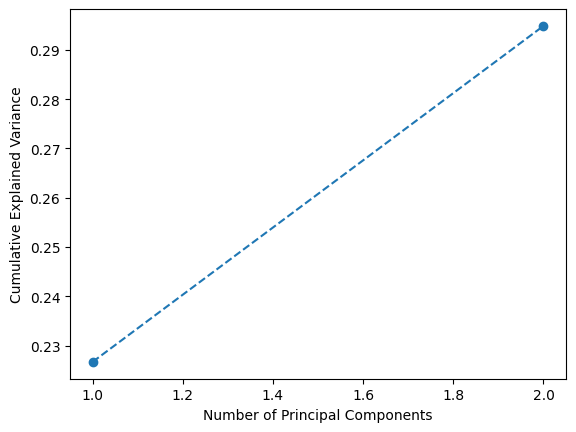

In [ ]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)  # Assuming you have 5 subgroups
cluster_labels = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([3, 4, 4, 3, 2, 3, 1, 3, 3, 1, 1, 4, 3, 1, 4, 4, 2, 0, 3, 3, 4, 3,
       1, 3, 4, 3, 1, 3, 0, 3, 2, 0, 4, 0, 0, 4, 3, 0, 4, 3, 0, 1, 1, 3,
       0, 3, 0, 3, 0, 3, 4, 3, 4, 3, 3, 3, 4, 4, 2, 1, 0, 1, 0, 3, 3, 3,
       3, 4, 3, 3, 0, 4, 2, 4, 0, 0, 0, 0, 4, 1, 3, 2, 3, 0, 0, 2, 3, 4,
       4, 0, 4, 1, 0, 2, 4, 0, 1, 0, 0, 3, 2, 3, 0, 1, 1, 2, 2, 3, 0, 4,
       2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0, 3, 4, 2, 2, 3, 3, 4, 4,
       4, 3, 1, 3, 0, 4, 4, 0, 0, 4, 1, 3, 4, 0, 0, 4, 4, 3, 1, 3, 3, 3,
       2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 0, 0, 3, 0, 1, 3, 1, 3, 0, 1, 4, 3,
       4, 1, 3, 4, 0, 4, 3, 0, 3, 1, 3, 4, 4, 0, 3, 3, 0, 0, 1, 3, 3, 4,
       1, 3, 0, 0, 3, 0, 0, 4, 3, 2, 4, 4, 2, 0, 3, 3, 0, 4, 3, 4, 3, 0,
       3, 4, 2, 1, 4, 3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 1, 4, 3, 0, 3, 3, 4,
       0, 0, 3, 0, 1, 3, 0, 3, 3, 1, 3, 4, 3, 2, 3, 0, 4, 3, 0, 0, 3, 1,
       1, 0, 3, 3, 1, 3, 4, 3, 3, 0, 1, 0, 3, 3, 2, 3, 2, 0, 2, 0, 0, 2,
       3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 4, 4,

In [ ]:
pca = PCA(n_components=None)

In [ ]:
pca.fit(selected_features)

PCA()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

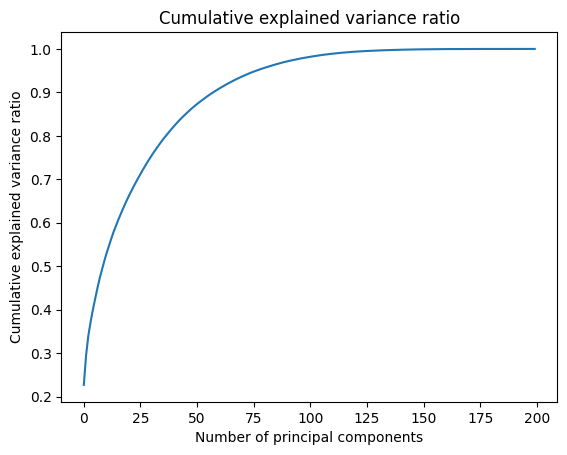

In [ ]:
plt.plot(explained_variance_ratio.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cumulative explained variance ratio')
plt.show()

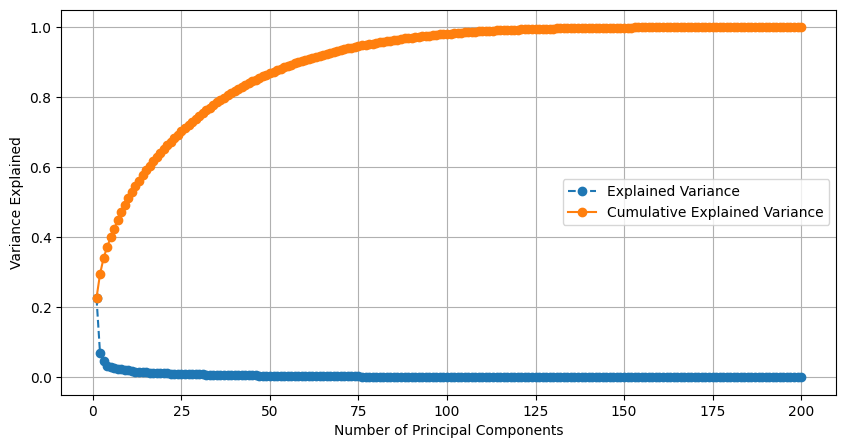

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)
plt.show()